<a href="https://colab.research.google.com/github/devanandini0210/zinc_detector/blob/main/YOLOv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#installing YOLOv5
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17483, done.
remote: Total 17483 (delta 0), reused 0 (delta 0), pack-reused 17483 (from 1)
Receiving objects: 100% (17483/17483), 16.58 MiB | 15.97 MiB/s, done.
Resolving deltas: 100% (11991/11991), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━

In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# unzipping the dataset
!unzip -q /content/drive/MyDrive/Master_Thesis/dataset.zip -d /content/dataset

In [ ]:
#updating the data.yaml file to colab paths
fixed_yaml = """
train: /content/dataset/dataset/images/train
val: /content/dataset/dataset/images/val
test: /content/dataset/dataset/images/test
nc: 1
names: ['zinc']
"""

with open("/content/dataset/dataset/data.yaml", "w") as f:
    f.write(fixed_yaml)

print("data.yaml fixed")

data.yaml fixed


In [ ]:
#training the model
!python train.py \
    --img 1024 \
    --batch 16 \
    --epochs 100 \
    --data /content/dataset/dataset/data.yaml \
    --cfg models/yolov5n.yaml \
    --name zinc_detector_yolov5 \
    --weights yolov5n.pt

Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
      76/99      5.99G    0.01686    0.01889          0         98       1024:  13% 13/102 [00:08<01:19,  1.11it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      76/99      5.99G    0.01669    0.01873          0        125       1024:  14% 14/102 [00:09<01:03,  1.39it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      76/99      5.99G    0.01667     0.0189          0        161       1024:  15% 15/102 [00:11<01:33,  1.08s/it]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp

In [ ]:
#saving the best model
import shutil
model_path = "/content/yolov5/yolo5_best.pt"
shutil.copy("runs/train/zinc_detector_yolov5/weights/best.pt", model_path)
print(f"\nYOLOv5 best model saved to: {model_path}")


YOLOv5 best model saved to: /content/yolov5/yolo5_best.pt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving yolo5_best.pt to yolo5_best.pt


In [ ]:
import torch
#loading the saved model
model = torch.hub.load('/content/yolov5', 'custom', path='/content/yolov5/yolo5_best.pt', source='local')

YOLOv5 🚀 v7.0-419-gcd44191c Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5n summary: 157 layers, 1760518 parameters, 0 gradients, 4.1 GFLOPs
Adding AutoShape... 


In [ ]:
#evaluating the model on test set
!python val.py \
    --weights /content/yolov5/yolo5_best.pt \
    --data /content/dataset/dataset/data.yaml \
    --task test \
    --img 1024 \
    --name zinc_test_eval \
    --save-txt \
    --save-conf

val: data=/content/dataset/dataset/data.yaml, weights=['/content/yolov5/yolo5_best.pt'], batch_size=32, imgsz=1024, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=True, save_hybrid=False, save_conf=True, save_json=False, project=runs/val, name=zinc_test_eval, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-419-gcd44191c Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5n summary: 157 layers, 1760518 parameters, 0 gradients, 4.1 GFLOPs
test: Scanning /content/dataset/dataset/labels/test.cache... 204 images, 0 backgrounds, 0 corrupt: 100% 204/204 [00:00<?, ?it/s]
test: WARNING ⚠️ /content/dataset/dataset/images/test/composited_0023.jpg: 1 duplicate labels removed
test: WARNING ⚠️ /content/dataset/dataset/images/test/composited_0039.jpg: 1 duplicate labels removed
test: WARNING ⚠️ /content/dataset/dataset/images/test/composited_0111_aug.jpg: 1 duplicate labels rem

In [ ]:
from val import run as val_run

#extracting the metrics
metrics = val_run(
    data='/content/dataset/dataset/data.yaml',
    weights='/content/yolov5/yolo5_best.pt',
    imgsz=1024,
    task='test',
    batch_size=32,
    name='zinc_test_eval3'
)

precision, recall, map_50 = metrics
P = float(metrics[0][0])
R = float(metrics[0][1])
mAP50 = float(metrics[0][2])
f1      = 2 * (P * R) / (P + R + 1e-6)

#printing map, recall, precision, and F1 score
print(f"Precision: {P:.4f}")
print(f"Recall: {R:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"mAP@0.5: {mAP50:.4f}")

YOLOv5 🚀 v7.0-419-gcd44191c Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5n summary: 157 layers, 1760518 parameters, 0 gradients, 4.1 GFLOPs
test: Scanning /content/dataset/dataset/labels/test.cache... 204 images, 0 backgrounds, 0 corrupt: 100%|██████████| 204/204 [00:00<?, ?it/s]
test: WARNING ⚠️ /content/dataset/dataset/images/test/composited_0023.jpg: 1 duplicate labels removed
test: WARNING ⚠️ /content/dataset/dataset/images/test/composited_0039.jpg: 1 duplicate labels removed
test: WARNING ⚠️ /content/dataset/dataset/images/test/composited_0111_aug.jpg: 1 duplicate labels removed
test: WARNING ⚠️ /content/dataset/dataset/images/test/composited_0122_aug.jpg: 1 duplicate labels removed
test: WARNING ⚠️ /content/dataset/dataset/images/test/composited_0124.jpg: 1 duplicate labels removed
test: WARNING ⚠️ /content/dataset/dataset/images/test/composited_0175.jpg: 1 duplicate labels removed
test: WARNING ⚠️ /content/dataset/dataset/images/test/comp

Precision: 0.9971
Recall: 0.9771
F1 Score: 0.9870
mAP@0.5: 0.9894


In [ ]:
from pathlib import Path

model_path = '/content/yolov5/yolo5_best.pt'
model_loaded = torch.load(model_path, map_location='cpu')

#model size
size_mb = Path(model_path).stat().st_size / (1024 * 1024)
print(f"\nModel Size: {size_mb:.2f} MB")

#number of parameters
params = sum(p.numel() for p in model_loaded['model'].parameters())
print(f"Model Parameters: {params:,}")


Model Size: 4.04 MB
Model Parameters: 1,765,270


In [ ]:
import time
from PIL import Image
import numpy as np

#reloading the model
model = torch.hub.load('/content/yolov5', 'custom', path=model_path, source='local')
model.eval()

#loading a test image
img_path = '/content/dataset/dataset/images/test/composited_0166_aug.jpg'
img = np.array(Image.open(img_path).convert('RGB'))

#measuring the time over multiple runs
n_trials = 20
start = time.time()
for _ in range(n_trials):
    _ = model(img)
elapsed = time.time() - start

inference_time = elapsed / n_trials
fps = 1 / inference_time

print(f"\nInference Time: {inference_time:.4f} sec/image")
print(f"FPS: {fps:.2f}")

YOLOv5 🚀 v7.0-419-gcd44191c Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5n summary: 157 layers, 1760518 parameters, 0 gradients, 4.1 GFLOPs
Adding AutoShape... 
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.


Inference Time: 0.0161 sec/image
FPS: 62.00


/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


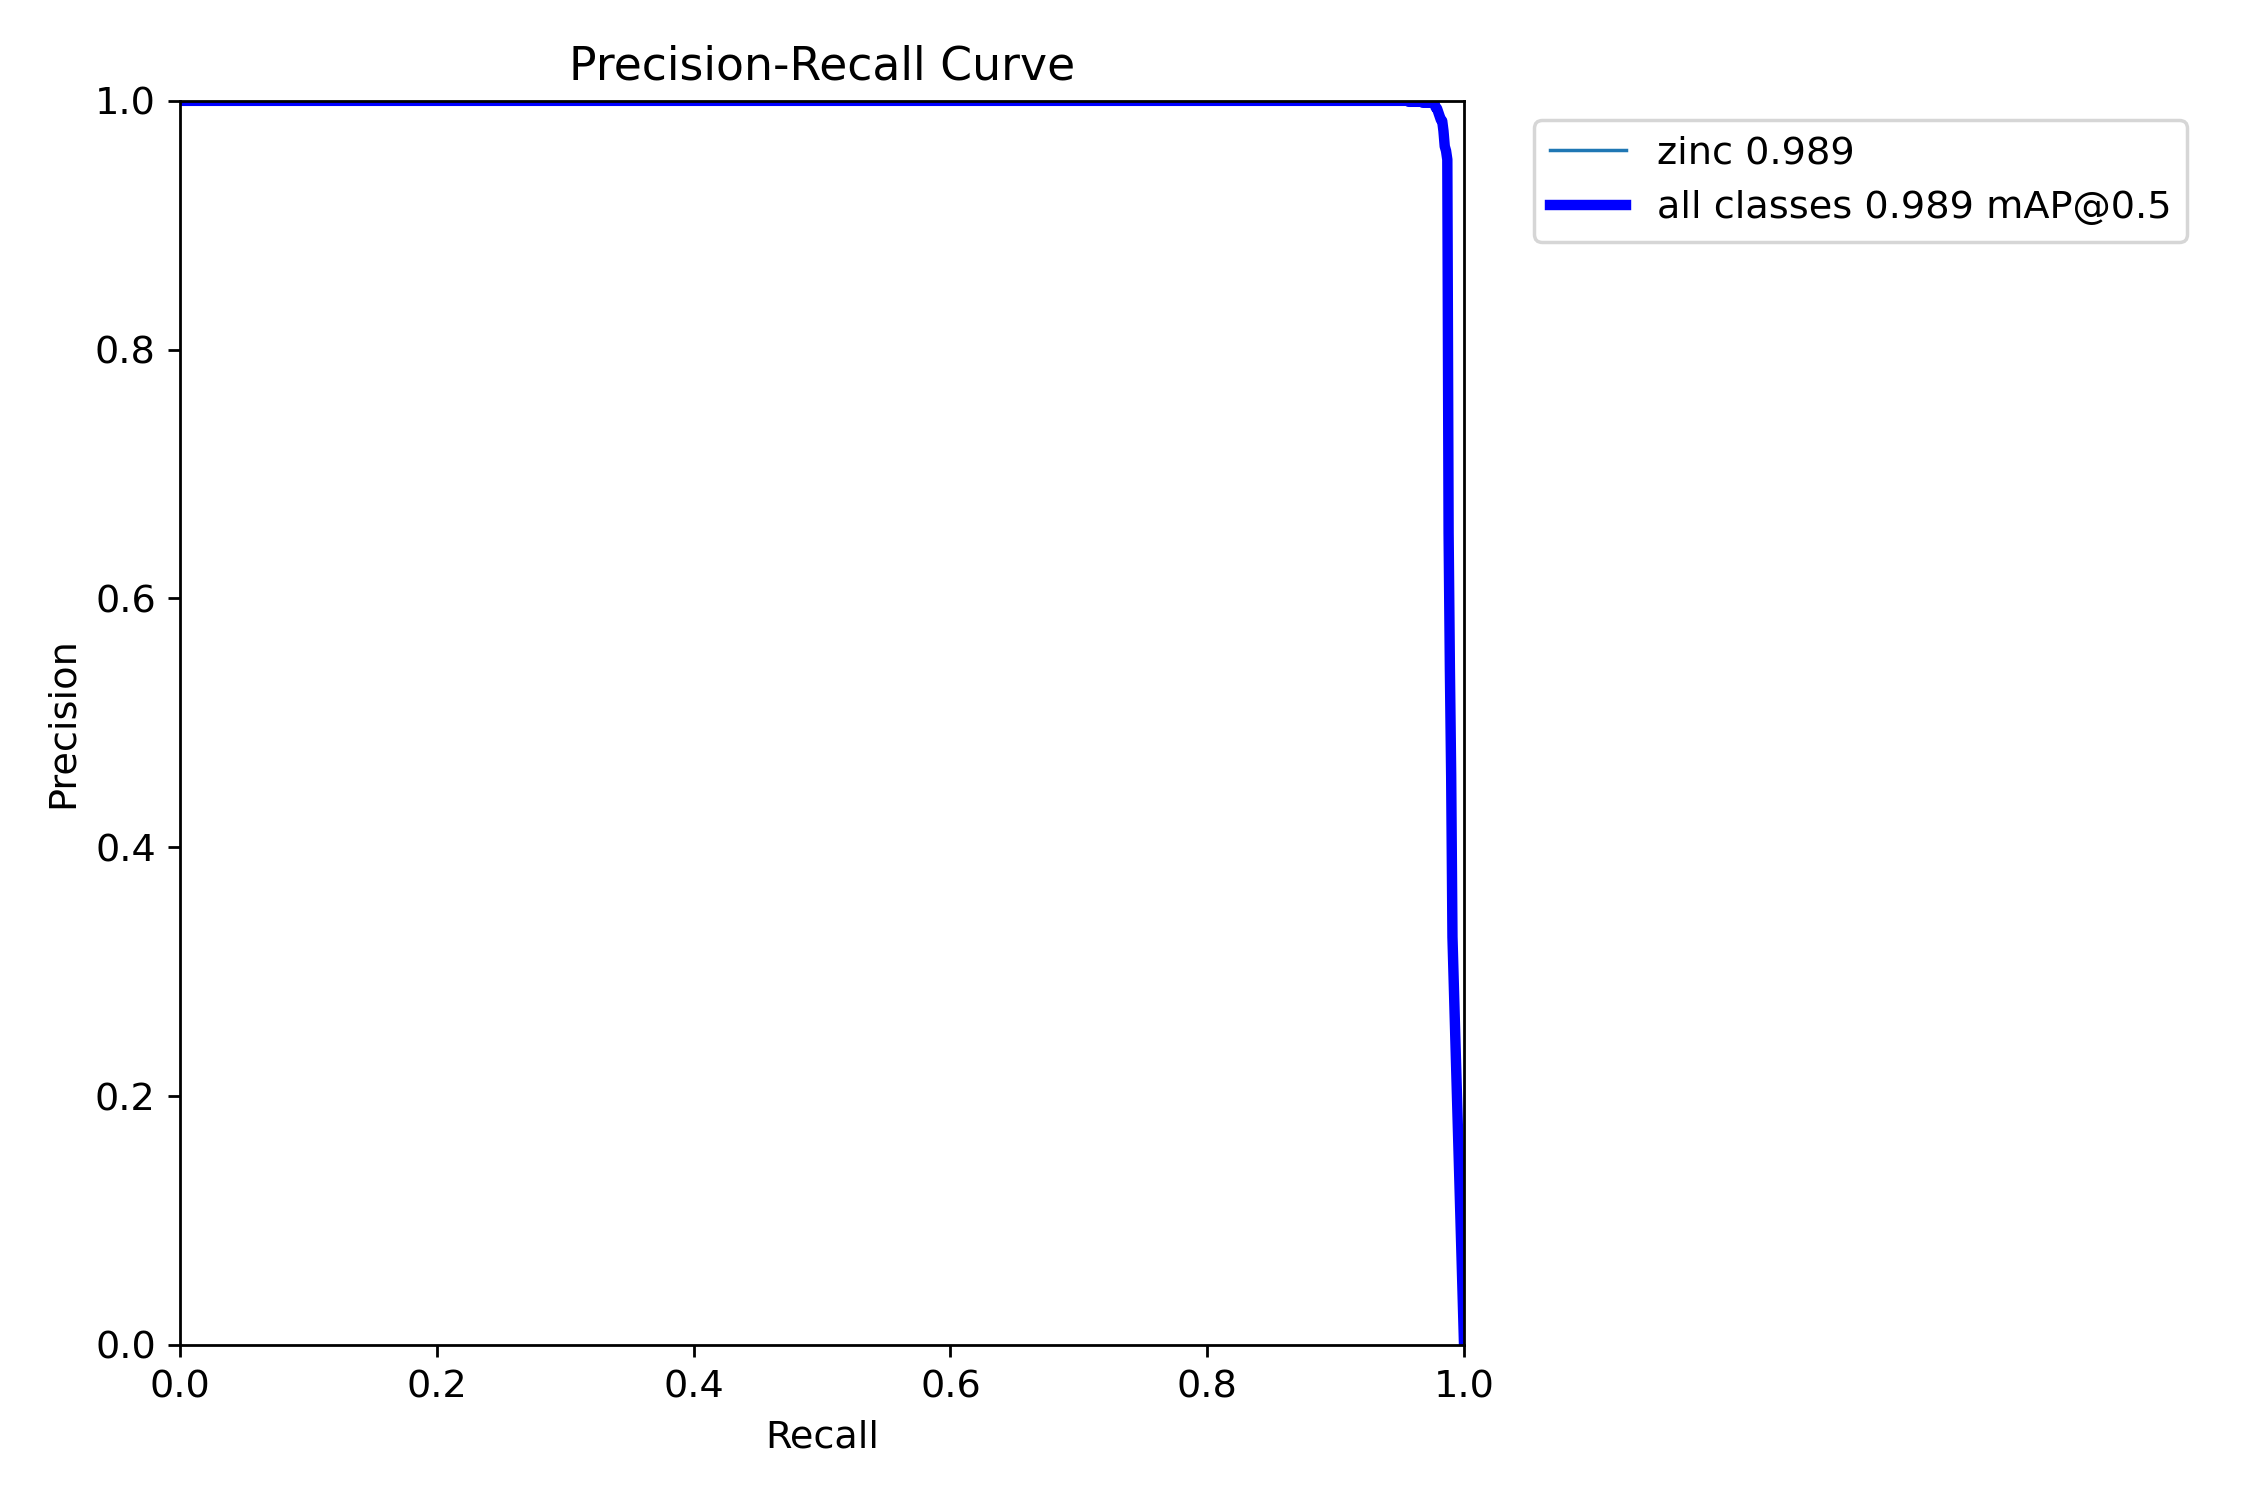

In [ ]:
#plotting the PR curve
from IPython.display import Image, display
display(Image('/content/yolov5/runs/val/zinc_test_eval5/PR_curve.png'))

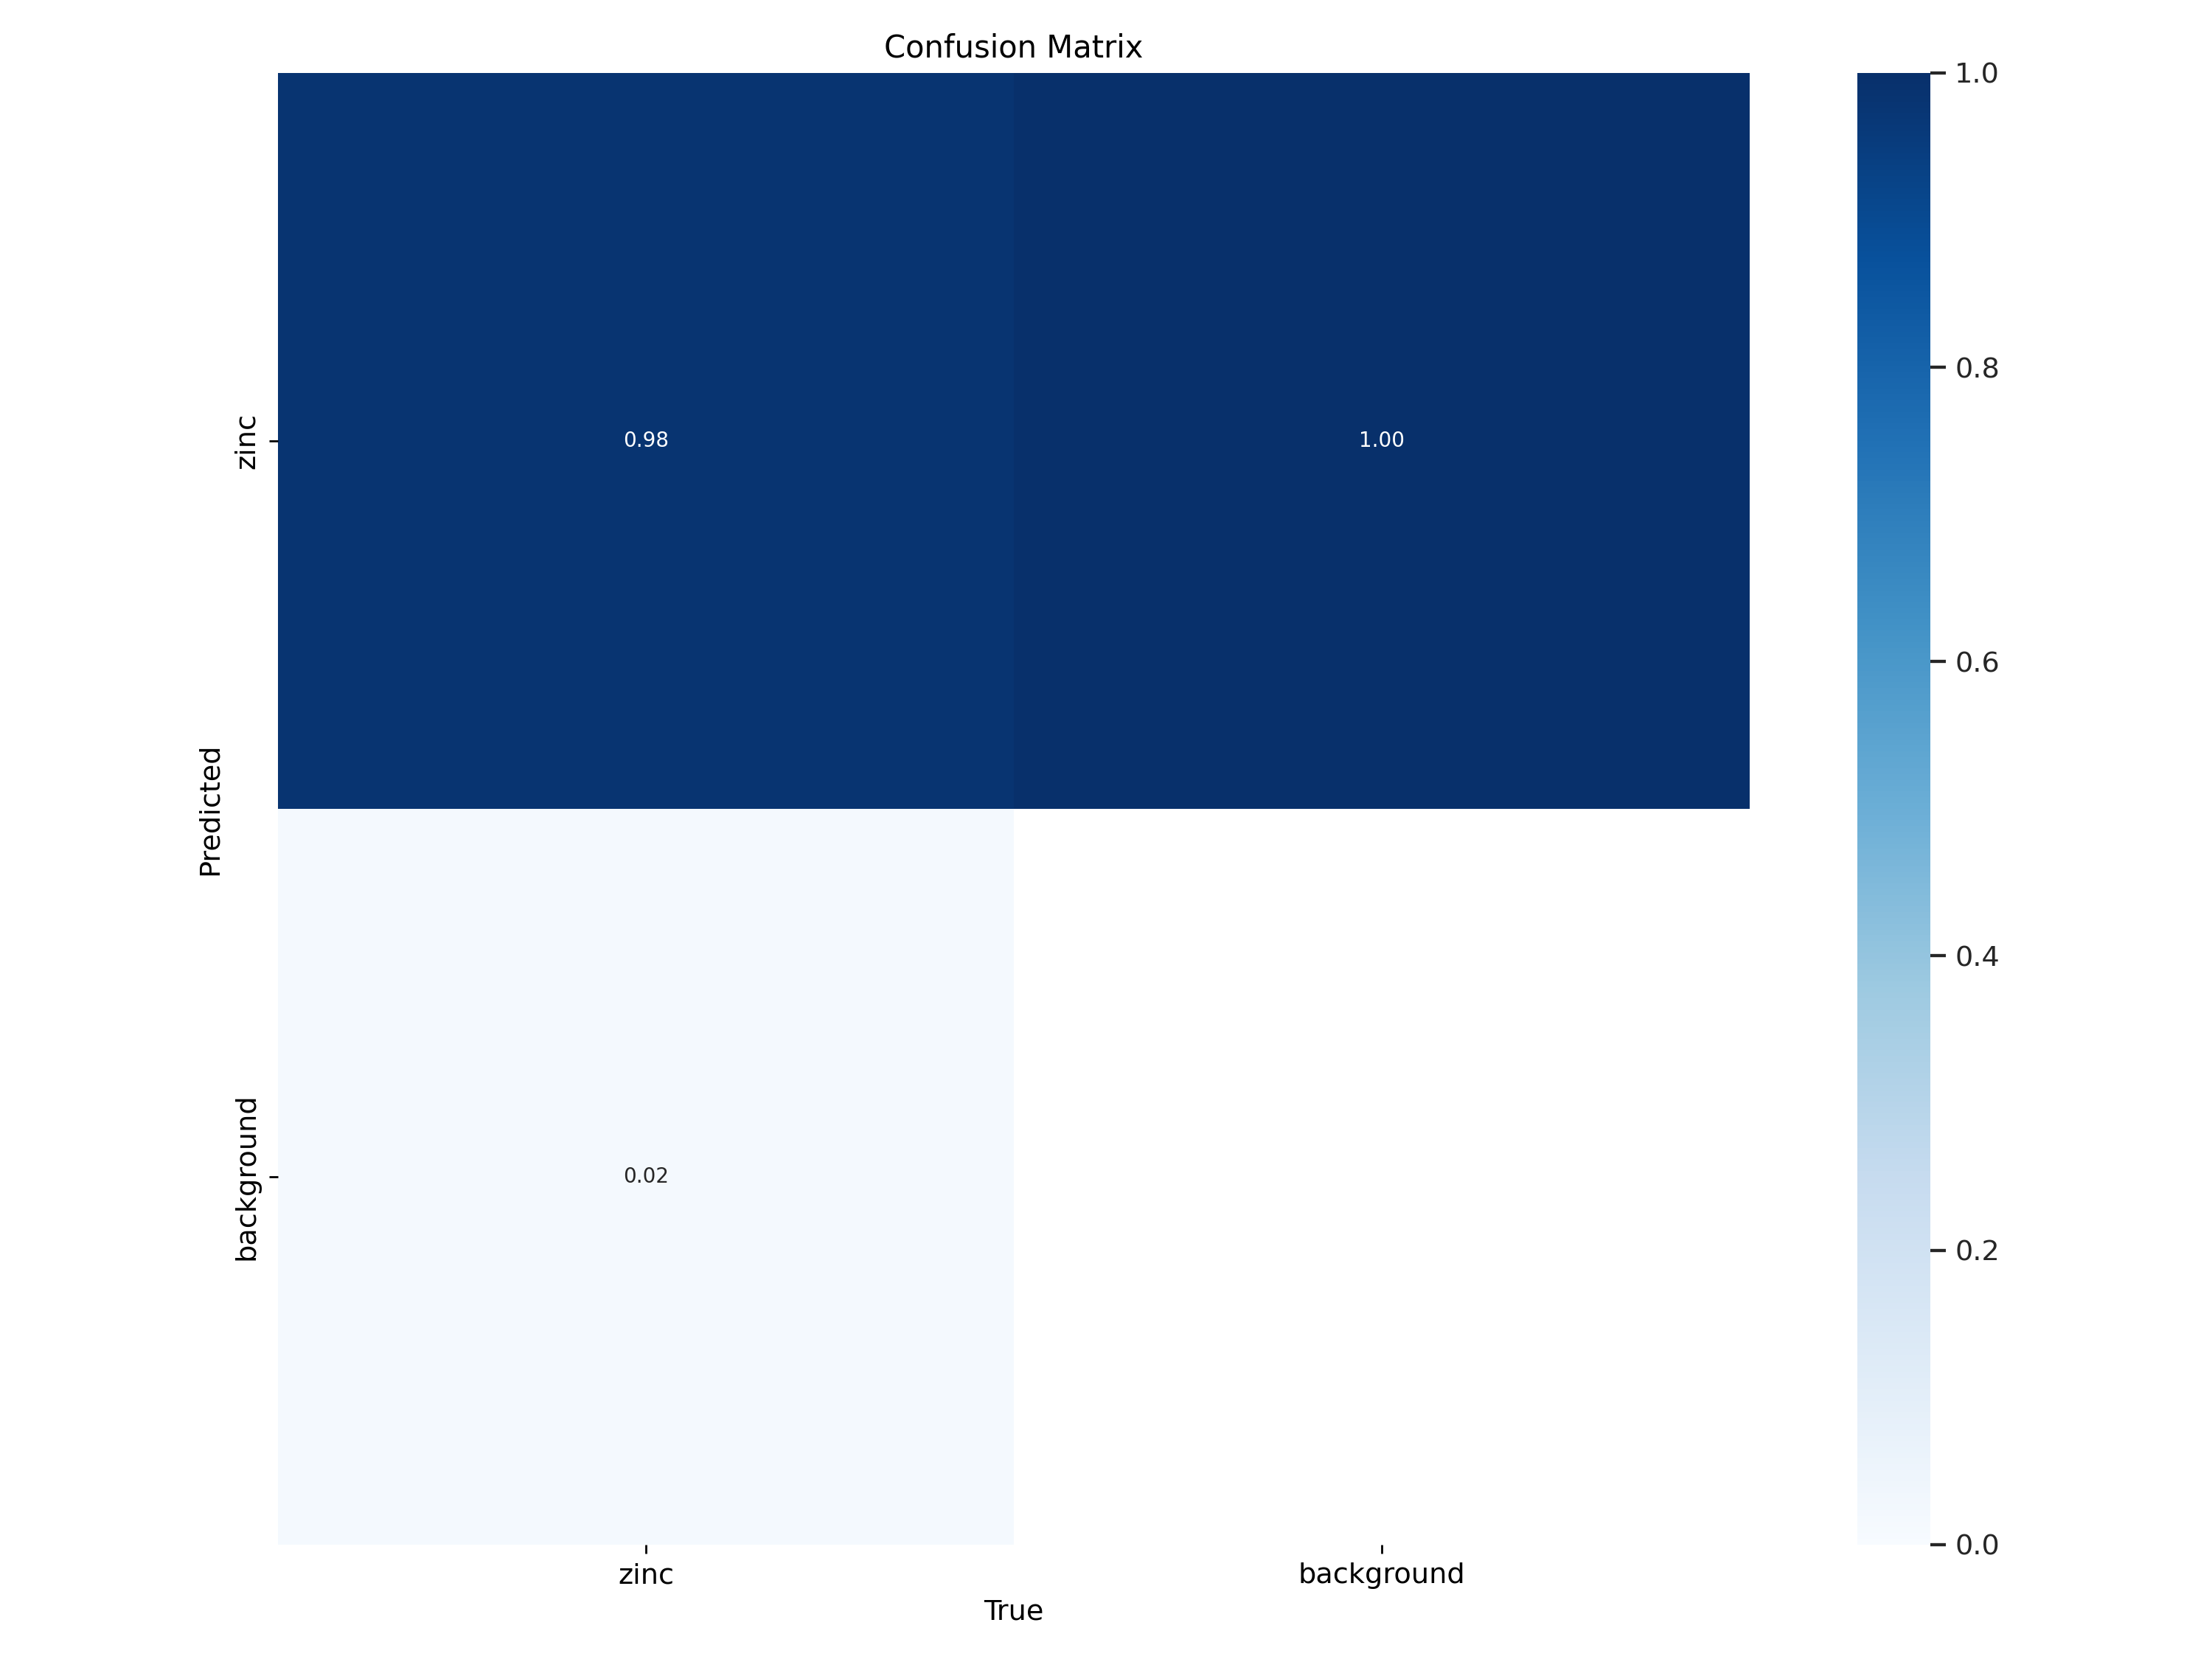

In [ ]:
#plotting the confusion matrix
display(Image('/content/yolov5/runs/val/zinc_test_eval5/confusion_matrix.png'))

In [ ]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from pathlib import Path

In [ ]:
#paths
pred_dir = Path("/content/yolov5/runs/val/zinc_test_eval5/labels")
gt_dir = Path("/content/dataset/dataset/labels/test")


confidences = []
ious = []
fp_coords = []
fn_coords = []


def compute_iou(box1, box2):t
    def to_xyxy(xc, yc, w, h):
        return [xc - w/2, yc - h/2, xc + w/2, yc + h/2]

    box1 = to_xyxy(*box1)
    box2 = to_xyxy(*box2)

    xi1 = max(box1[0], box2[0])
    yi1 = max(box1[1], box2[1])
    xi2 = min(box1[2], box2[2])
    yi2 = min(box1[3], box2[3])
    inter_area = max(0, xi2 - xi1) * max(0, yi2 - yi1)

    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area if union_area > 0 else 0

#processing predictions vs ground truth
for pred_file in tqdm(sorted(pred_dir.glob("*.txt"))):
    gt_file = gt_dir / pred_file.name
    if not gt_file.exists():
        continue

    preds = np.loadtxt(pred_file, ndmin=2)
    gts = np.loadtxt(gt_file, ndmin=2)

    matched_gt = set()
    for pred in preds:
        pred_box = pred[1:5]
        conf = pred[5] if len(pred) > 5 else 1.0
        best_iou = 0
        best_gt_idx = -1
        for i, gt in enumerate(gts):
            if i in matched_gt:
                continue
            iou = compute_iou(pred_box, gt[1:5])
            if iou > best_iou:
                best_iou = iou
                best_gt_idx = i
        confidences.append(conf)
        ious.append(best_iou)
        if best_iou < 0.5:
            fp_coords.append(pred_box)
        else:
            matched_gt.add(best_gt_idx)

    #handling the FNs
    for i, gt in enumerate(gts):
        if i not in matched_gt:
            fn_coords.append(gt[1:5])

100%|██████████| 204/204 [00:00<00:00, 1887.72it/s]


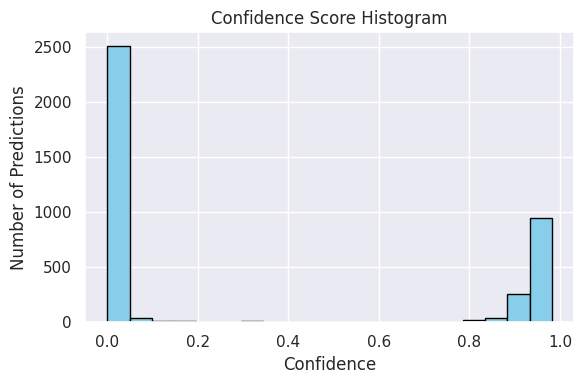

In [ ]:
#plotting the confidence histogram
plt.figure(figsize=(6, 4))
plt.hist(confidences, bins=20, color='skyblue', edgecolor='black')
plt.title("Confidence Score Histogram")
plt.xlabel("Confidence")
plt.ylabel("Number of Predictions")
plt.grid(True)
plt.tight_layout()
plt.show()

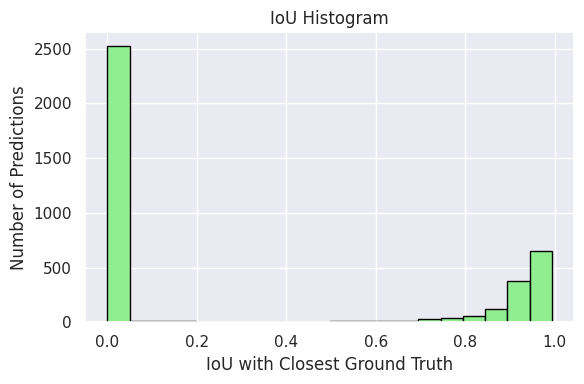

In [ ]:
#plotting the IoU Histogram
plt.figure(figsize=(6, 4))
plt.hist(ious, bins=20, color='lightgreen', edgecolor='black')
plt.title("IoU Histogram")
plt.xlabel("IoU with Closest Ground Truth")
plt.ylabel("Number of Predictions")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#function to plot heatmaps
def draw_heatmap(coords, title="Heatmap", img_size=1024):
    import matplotlib.pyplot as plt
    import seaborn as sns

    if not coords:
        print(f"No coordinates to plot for {title}")
        return

    xs = [c[0] * img_size for c in coords]
    ys = [c[1] * img_size for c in coords]

    #creating heatmap
    heatmap, xedges, yedges = np.histogram2d(xs, ys, bins=50, range=[[0, img_size], [0, img_size]])

    plt.figure(figsize=(6, 5))
    sns.heatmap(heatmap.T, cmap="hot", square=True, cbar=True)
    plt.title(title)
    plt.xlabel("X position")
    plt.ylabel("Y position")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

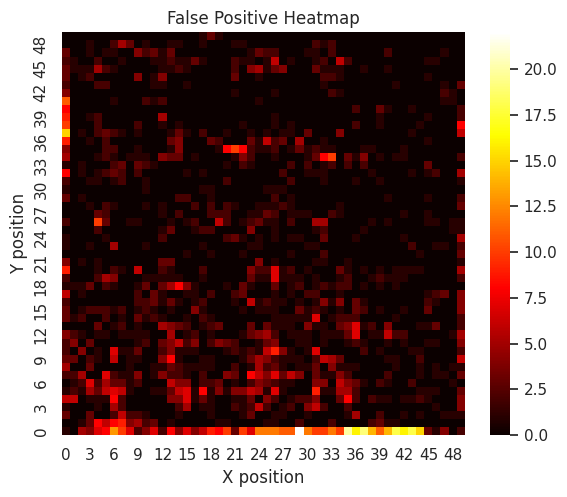

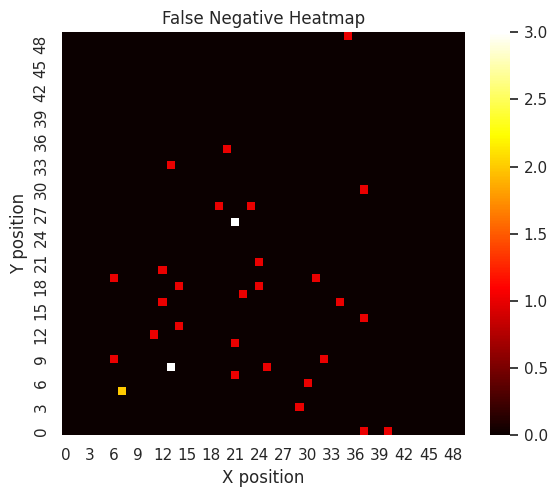

In [ ]:
#plotting the FP heatmap
draw_heatmap(fp_coords, title="False Positive Heatmap")
#plotting the FN heatmap
draw_heatmap(fn_coords, title="False Negative Heatmap")

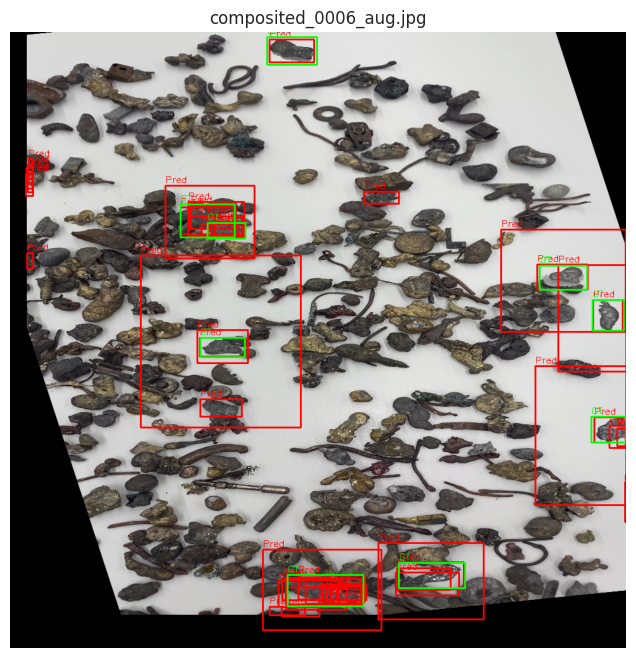

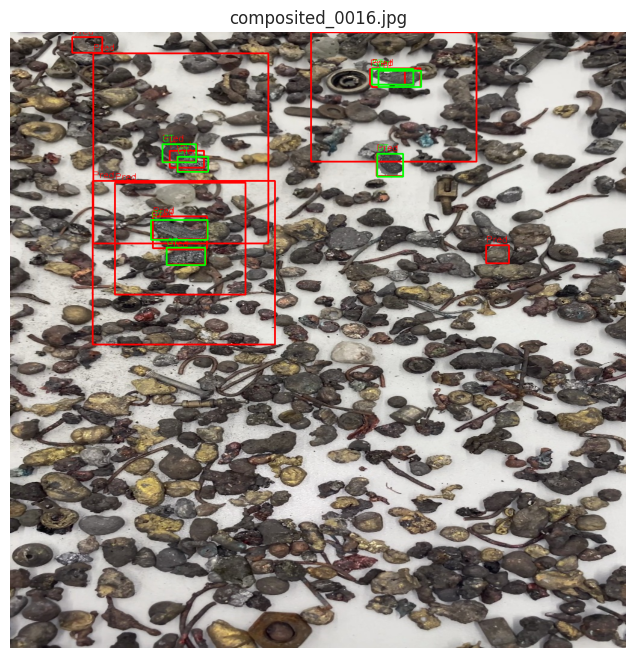

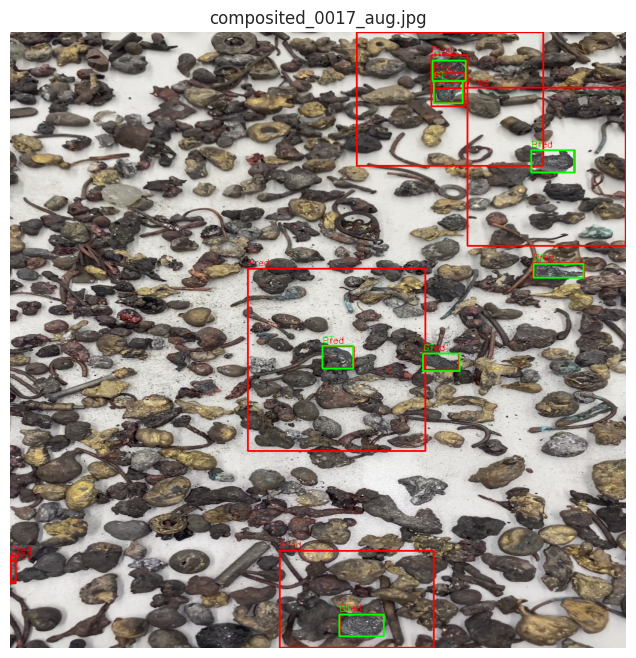

In [ ]:
# Paths
img_dir = Path("/content/dataset/dataset/images/test")
gt_dir = Path("/content/dataset/dataset/labels/test")
pred_dir = Path("/content/yolov5/runs/val/zinc_test_eval5/labels")

# Choose 3 sample files
samples = sorted(pred_dir.glob("*.txt"))[:3]

# Visualization loop
for txt_path in samples:
    img_name = txt_path.stem + ".jpg"
    img_path = img_dir / img_name
    gt_path = gt_dir / txt_path.name

    # Load image
    img = cv2.imread(str(img_path))
    if img is None:
        print(f"Image not found: {img_path}")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]

    # Load boxes
    preds = np.loadtxt(txt_path, ndmin=2)
    gts = np.loadtxt(gt_path, ndmin=2)

    # Draw predicted boxes (red)
    for p in preds:
        xc, yc, bw, bh = p[1:5]
        x1 = int((xc - bw / 2) * w)
        y1 = int((yc - bh / 2) * h)
        x2 = int((xc + bw / 2) * w)
        y2 = int((yc + bh / 2) * h)
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(img, "Pred", (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    # Draw ground truth boxes (green)
    for g in gts:
        xc, yc, bw, bh = g[1:5]
        x1 = int((xc - bw / 2) * w)
        y1 = int((yc - bh / 2) * h)
        x2 = int((xc + bw / 2) * w)
        y2 = int((yc + bh / 2) * h)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, "GT", (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

    # Show image
    %matplotlib inline
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.title(f"{img_name}")
    plt.axis('off')
    plt.show()